In [1]:
# import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [10]:
# load data
data = pd.read_csv('Lnfix.csv', encoding= 'utf-8')
data.head(20)

,artist,author,gernes,heart,name,star,view,words
0,None,Phantom Of The Moonlit Night,"Action,Adventure,Comedy,Fantasy,Harem,Seinen,S...",132,Running Away From The Hero! (Remake),5.0,4071,6986
1,Shizuma Yoshinori (しずまよしのり),Shuu (秋),"Action,Adventure,Comedy,Fantasy,Harem,Romance,...",6651,Maou Gakuin no Futekigousha ~Shijou Saikyou no...,4.8,5978437,636903
2,Fuumi,Itsuki Mizuho,"Adventure,Comedy,Fantasy,Slice of Life,Superna...",130,The Novice Alchemist's Store,5.0,7644,30539
3,Macchi | 마끼,이윤아,"Drama,Fantasy,Josei,Korean Novel,Mature,Romance",51,Lời Cầu Hôn Của Bạo Chúa,4.6,10419,43480
4,sime,cadet,"Action,Drama,Fantasy,Romance,School Life,Seine...",1832,"Ori of the Dragon Chain - ""Heart"" in the mind",4.8,358243,85317
5,Shirotaka,Rifujin na Magonote,"Action,Adventure,Fantasy,Harem,Isekai,Web Nove...",7051,Mushoku Tensei - Isekai Ittara Honki Dasu,4.9,12107698,1436669
6,Poko,Takehaya,"Action,Adventure,Comedy,Harem,Mecha,Slice of L...",2664,Rokujouma no Shinryakusha!?,4.9,2105928,2324415
7,Moran,리샤,"Adventure,Comedy,Fantasy,Korean Novel,Psycholo...",209,The baby raising a devil,4.9,33291,48322
8,Ryutetsu,Anikki Burazza,"Action,Adventure,Comedy,Fantasy,Harem,Martial ...",4479,Breakthrough with the Forbidden Master,4.9,3170603,398108
9,None,Nekoko,"Action,Adventure,Comedy,Fantasy,Slice of Life,...",3639,Tensei shitara doragon no tamago datta ~ saiky...,4.9,2884910,628000


In [5]:
df_1 = data['gernes']
df_1


0       Action,Adventure,Comedy,Fantasy,Harem,Seinen,S...
1       Action,Adventure,Comedy,Fantasy,Harem,Romance,...
2       Adventure,Comedy,Fantasy,Slice of Life,Superna...
3         Drama,Fantasy,Josei,Korean Novel,Mature,Romance
4       Action,Drama,Fantasy,Romance,School Life,Seine...
                              ...                        
1945                                Romance,Slice of Life
1946    Action,Adventure,Comedy,Fantasy,Harem,Mystery,...
1947    Adult,Comedy,Ecchi,Harem,Mature,Romance,School...
1948    Action,Ecchi,Fantasy,Harem,Super Power,Adult,I...
1949                                    Adventure,Fantasy
Name: gernes, Length: 1950, dtype: object

In [ ]:
# Đếm có bao nhiêu Ln/ WN thuộc thể loại Action, Comedy
count = 0
for i in df_1:
  isAction = False 
  isComedy = False
  t = i.split(',') # chuyển string thành list. Ex: 'a, b, c' -> ['a', 'b', c'']
  for x in t:
    x = x.strip() # xoá khoảng trắng đầu và cuối kí tự ex: ' a' or 'a ' -> 'a'
    if x == 'Comedy':
      isComedy = True
    if x == 'Action':
      isAction = True
  if isComedy == True and isAction == True:
    count += 1
print(count)
      

479


In [9]:
# Đếm có bao nhiêu truyện thuộc thể loại Romance
count = 0
for i in df_1:
  isRomance = False
  t = i.split(',')
  for x in t:
    x = x.strip()
    if x == 'Romance':
      isRomance = True
  if isRomance == True:
    count+=1
  
print(count)

1188


In [ ]:
# list các thể loại truyện
gernes = []
for i in df_1:
  t = i.split(',')
  for x in t:
    x = x.strip()
    if x not in gernes:
      gernes.append(x)

In [ ]:
gernes.sort() # sắp xếp theo bảng chữ cái
print(gernes)
print(len(gernes))

['Action', 'Adapted to Anime', 'Adapted to Drama CD', 'Adapted to Manga', 'Adult', 'Adventure', 'Chinese Novel', 'Comedy', 'Cooking', 'Drama', 'Ecchi', 'English Novel', 'Fantasy', 'Game', 'Gender Bender', 'Harem', 'Historical', 'Horror', 'Incest', 'Isekai', 'Josei', 'Korean Novel', 'Magic', 'Martial Arts', 'Mature', 'Mecha', 'Military', 'Mystery', 'Netorare', 'One shot', 'Otome Game', 'Psychological', 'Reverse Harem', 'Romance', 'School Life', 'Science Fiction', 'Seinen', 'Shoujo', 'Shoujo ai', 'Shounen', 'Shounen ai', 'Slice of Life', 'Sports', 'Super Power', 'Supernatural', 'Suspense', 'Tragedy', 'Web Novel', 'Yuri']
49


In [ ]:
# số truyện có có trong từng thể loại
gernes_count =[]
def gerne_count(X):
  count = 0
  for i in df_1:
    isA = False
    t = i.split(',')
    for x in t:
      x = x.strip()
      if x == X:
        isA = True
    if isA == True:
      count+=1
  return count
for i in gernes:
  gernes_count.append(gerne_count(i))


In [ ]:
print(gernes_count)


[939, 64, 17, 203, 105, 831, 53, 1022, 22, 621, 327, 2, 1187, 58, 86, 615, 43, 87, 17, 332, 45, 131, 213, 64, 182, 44, 43, 200, 6, 74, 31, 210, 6, 1182, 508, 117, 211, 144, 75, 271, 8, 526, 3, 156, 335, 18, 209, 564, 53]


In [ ]:
Type = []
for i in data['words']:
  if i <= 20000:
    Type.append('Low')
  elif 20000 < i <= 70000:
    Type.append('Medium')
  elif 70000 < i <= 150000:
    Type.append('High')
  elif 150000 < i <= 300000:
    Type.append('Super_High')
  else:
    Type.append('Mega_High') 
data1 = data.copy()
data1.insert(8, 'Type_words', Type)
data1.head(10)

,artist,author,gernes,heart,name,star,view,words,Type_words
0,NaN,風井明日香,"Comedy,Romance,Supernatural,Web Novel,Slice of...",614,"Mandarin Orange, Kotatsu, And A Found Cat",4.9,36519,28056,Medium
1,NaN,Serian,"Comedy,Fantasy,Historical,Josei,Korean Novel,P...",55,Ốm đau ư? Cô vợ hợp đồng của công tước.,4.1,10448,27307,Medium
2,Fuumi,Natsunomi,"Comedy,Romance,School Life,Slice of Life",2414,"Koibito Daikou wo hajimeta Ore, naze ka Bishou...",4.9,284252,203751,Super_High
3,NaN,Gennou Tomohiro,"One shot,Romance",1,Two Quarrelsome Childhood Friends Locked In A ...,0.0,21,2953,Low
4,Toi8,門司柿家 ( Mojikakiya),"Comedy,Fantasy",198,Boukensha ni Naritai to Miyako ni Deteitta Mus...,5.0,37612,28303,Medium
5,Achiki [ Aちき ],Izumi [ 泉 ],"Action,Adapted to Manga,Comedy,Fantasy,Harem,I...",1135,Ore no Shibou Flag ga Todomaru Tokoro wo Shiranai,4.9,117953,96163,High
6,NaN,Agar Jelly / Kanten Jelly / 寒天ゼリヰ,"Action,Adventure,Comedy,Ecchi,Harem,Mecha,Scie...",51,The Story of an Ace Pilot Who Is the Only Man ...,4.8,1440,1777,Low
7,たん旦; Tantan,氷高悠 ; Yuu Hidaka,"Comedy,Romance,School Life",4574,My Plain-looking Fiancee is Secretly Sweet wit...,4.9,1040894,123056,High
8,chibi,Kuji Furumiya,"Action,Adapted to Manga,Comedy,Fantasy,Romance",380,Unnamed Memory,5.0,20819,113943,High
9,Chyko,Tsukikage,"Action,Adapted to Manga,Comedy,Fantasy,Harem",1910,Nageki no Bourei wa Intai Shitai - Saijiyaku H...,4.9,828489,557744,Mega_High


In [ ]:
# bảng thống kê % words
x = data1.groupby('Type_words')['Type_words'].count() # tạo nhóm dữ liệu theo cột Type_words
x = pd.DataFrame(x) # chuyển thành dataframe
x.columns = ['Percent'] # chuyển cột với index là Percent
type_inc = x/sum(x['Percent'])*100
type_inc


,Percent
Type_words,
High,13.495346
Low,44.932782
Medium,28.386763
Mega_High,5.584281
Super_High,7.600827


Text(0, 0.5, 'Percent')

<Figure size 576x576 with 0 Axes>

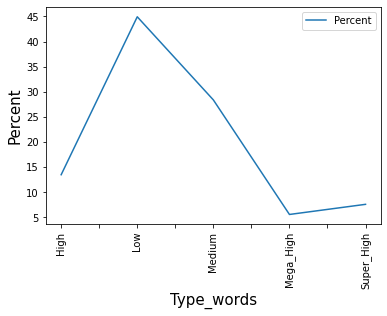

In [ ]:
plt.figure(figsize=(8, 8))
type_inc.plot()
plt.xticks(rotation =90, fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Type_words', fontsize=15)
plt.ylabel('Percent', fontsize=15)